## Question: Which areas in New York City have the highest AirBnB prices?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<BarContainer object of 5 artists>

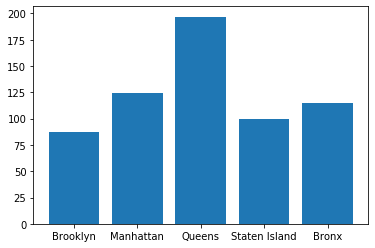

In [3]:
original_data = pd.read_csv('New_York_City.csv')
plt.bar(original_data['neighbourhood_group'].unique(),original_data.groupby('neighbourhood_group').mean()['price'])

In [71]:
#print(original_data.columns)
data=original_data.drop_duplicates(subset=['host_id','latitude','longitude'])
print(data[['price']].describe())
data = data.loc[data['price']<300] #0 to above 75%

              price
count  48893.000000
mean     152.721003
std      240.159023
min        0.000000
25%       69.000000
50%      106.000000
75%      175.000000
max    10000.000000


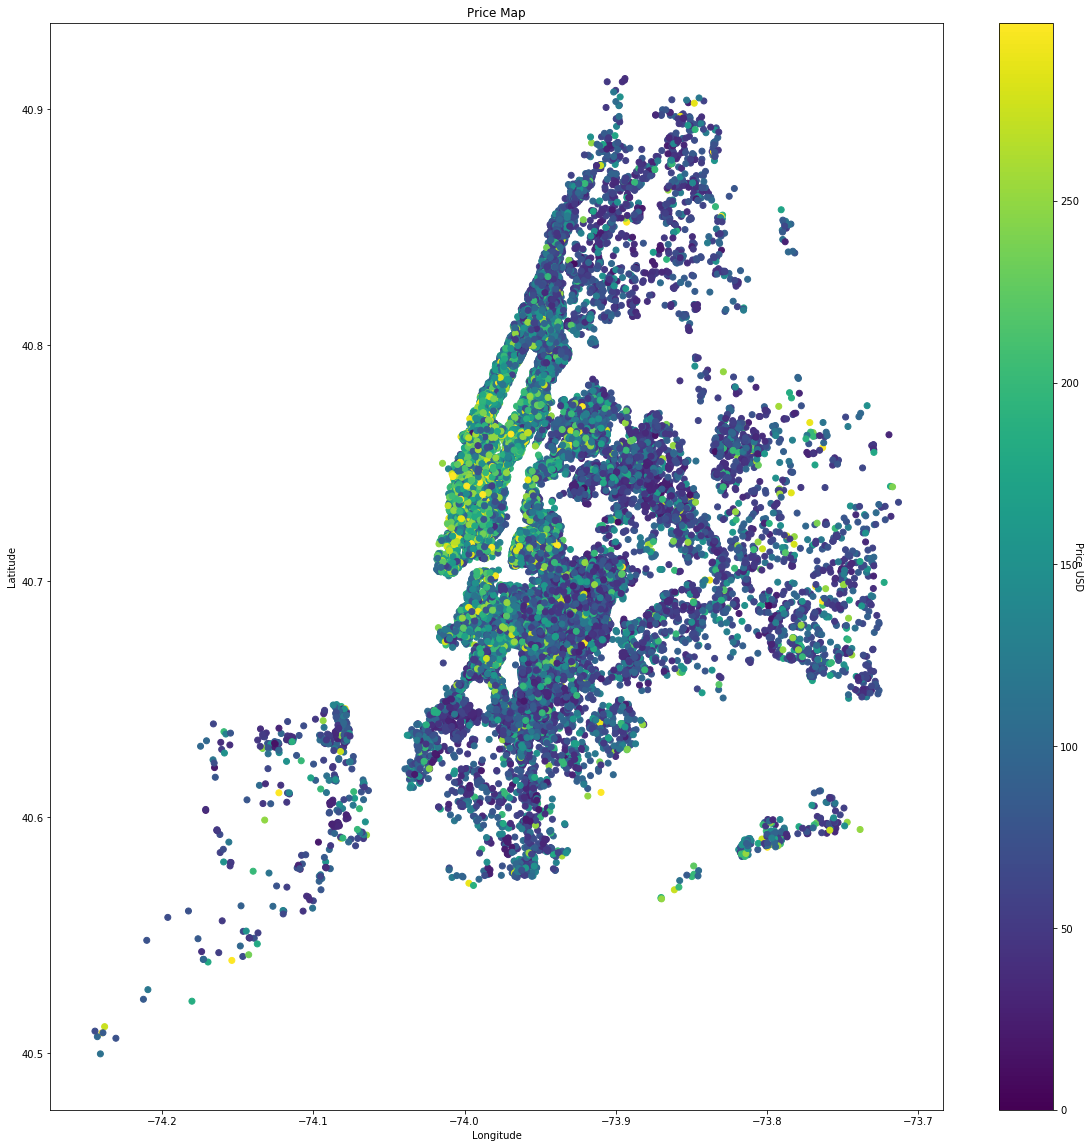

In [73]:
fig= plt.figure(figsize=(20,20))

plt.scatter(data['longitude'],data['latitude'],c=data['price'])
cbar = plt.colorbar()
cbar.set_label('Price USD', rotation=270)
plt.title('Price Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

This map shows that the highest priced AirBnB locations are in Manhatten, particularly south of central park. Locations which are near southern Manhatten, but located in neighboring boroughs, also demand hcgh prices. Of course, there are also high priced locations that are not as close to Manhatten, but they are more sparce. Generally, the further from Manhatten one looks, the lower the price.

##### Extra: Price Center

In [78]:
data['price_lon']=data.apply(lambda x: x.price * x.longitude, axis=1)
data['price_lat']=data.apply(lambda x: x.price * x.latitude, axis=1)
center_lon = data['price_lon'].sum() / data['price'].sum()
center_lat = data['price_lat'].sum() / data['price'].sum()
print("Price Center of NYC AirBnB Listings: ")
print("Longitude: ", center_lon)
print("Latitude: ", center_lat)

Price Center of NYC AirBnB Listings: 
Longitude:  -73.95805628655208
Latitude:  40.73034160206254
